In [1]:
import pandas as pd
import numpy as np
import random
from linear_regression.core import MyLinearRegression 

ModuleNotFoundError: No module named 'linear_regression'

In [ ]:
X = [x for x in range(100)]
y = [3 * y + 6 + random.randint(-15,15) for y in range(100)]
print(X)
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[10, -1, 15, 3, 13, 34, 38, 40, 21, 25, 50, 35, 34, 43, 51, 59, 57, 58, 65, 56, 65, 67, 68, 82, 78, 71, 74, 84, 95, 81, 90, 90, 92, 100, 103, 126, 108, 130, 117, 108, 127, 114, 132, 142, 135, 135, 134, 146, 146, 158, 156, 151, 161, 155, 182, 180, 173, 171, 195, 168, 193, 180, 186, 182, 204, 188, 200, 193, 212, 223, 226, 216, 215, 226, 233, 240, 225, 242, 242, 231, 246, 252, 253, 261, 261, 256, 279, 257, 255, 262, 285, 267, 297, 283, 284, 296, 284, 294, 299, 303]


In [ ]:
# Simple Linear Regression 
def regression(x: list[float], y: list[float]):
    if (len(x) != len(y)):
        raise ValueError("Unequal amount of x and y observations")
    if (len(x) < 2):
        raise ValueError("X observations have to be greater than 2")
    X_mean = sum(x) / len(x)
    y_mean = sum(y) / len(y)
    alpha = sum((a-X_mean) * (b-y_mean) for a, b in zip(x,y)) / sum((a-X_mean) ** 2 for a in x)
    beta = y_mean - alpha * X_mean
    return (alpha, beta)

In [ ]:
print(regression(X, y))

(2.995265526552655, 6.244356435643567)


In [ ]:
# Using simple linear regression model to predict
def predict(X_val, alpha, beta):
    return alpha * X_val + beta

In [ ]:
alpha, beta = regression(X, y)
predict(20, alpha, beta)

64.95569156915693

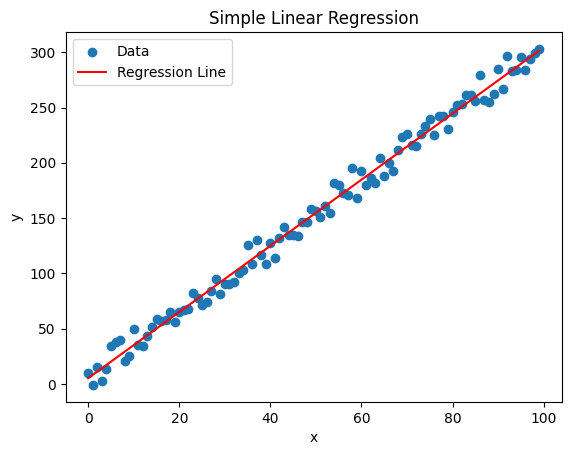

In [ ]:
# Plotting data and the regression line
import matplotlib.pyplot as plt

# Plotting the data points
plt.scatter(X, y, label="Data")

# Plotting Regression Line
y_pred = [predict(xi, alpha, beta) for xi in X]
plt.plot(X, y_pred, color="Red", label="Regression Line")

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Simple Linear Regression")
plt.show()

In [ ]:
# Performance Metrics

# Mean Squared Error
def get_mse(alpha, beta, x, y):
    return sum((alpha * x[i] + beta - y[i]) ** 2 for i in range(len(y))) / len(y)

# R^2
def get_rsquared(alpha, beta, x, y):
    y_mean = sum(y) / len(y)
    rss = sum((alpha * x[i] + beta - y[i]) ** 2 for i in range(len(y)))
    tss = sum((y[i]-y_mean) ** 2 for i in range(len(y))) + 0.0001
    return 1 - (rss / tss)

In [ ]:
print(get_mse(alpha, beta, X, y))
print(get_rsquared(alpha, beta, X, y))

67.56408466846686
0.9910337487078781


In [ ]:
# Multi-Linear Regression

X_raw = [[random.uniform(0, 20), random.uniform(0, 20)] for _ in range(50)]
X = np.array([[1.0] + x for x in X_raw])
y = np.array([2.0 * x1 - 3.0 * x2 + random.uniform(-5,5) for x1, x2 in X_raw])
theta = np.linalg.inv(X.T @ X) @ X.T @ y

In [ ]:
print(theta)

[ 0.56791025  2.07385605 -3.13345458]


In [ ]:
# Testing Multi Linear Regression
raw = [[random.uniform(0, 100), random.uniform(0, 100), random.uniform(0,100)] for _ in range(300)]
X = np.array([[1.0] + x for x in raw])
y = np.array([3.5 * x1 + 5 * x2 - 4 * x3 + 7 + random.uniform(-1,1) for x1, x2, x3 in raw])


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
model = MyLinearRegression()
model.fit(X_train, y_train)
train_r2 = model.r_squared(X_train, y_train)
test_r2 = model.r_squared(X_test, y_test)
print(f"Training R2: {train_r2}")
print(f"Test R2: {test_r2}")

Training R2: 0.9999923954031213
Test R2: 0.9999936156384952


In [ ]:
# Trying out more complex data

# Correlated features

x1 = np.random.uniform(0,50, size=100)
x2 = 2.5 * x1 + 1 + np.random.normal(0,1, size = 100) # correlated feature
x3 = np.random.uniform(0,50, size=100)
raw = np.column_stack([x1,x2,x3])
X = np.column_stack([np.ones(len(x1)), raw])

real_weights = [2.0,3.0,-1.5,2.5] # [bias, w1, w2, w3]
y = X @ real_weights + np.random.normal(0,1,size=100)

In [ ]:
correlated_model = MyLinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=41)
correlated_model.fit(X_train, y_train)
print(correlated_model.theta)

[ 2.08727494  3.23125145 -1.58812532  2.48245222]


In [ ]:
r2 = correlated_model.r_squared(X_train, y_train)
r2_test = correlated_model.r_squared(X_test, y_test)

print(f"R-Squared for training collinear data: {r2}")
print(f"R-Squared for test collinear data: {r2_test}")

R-Squared for training collinear data: 0.9995132051016378
R-Squared for test collinear data: 0.999493526282222


In [ ]:
# Trying out data with polynomial features

x1_sq = x1 ** 2
x2_sq = x2 ** 2

raw = np.column_stack([x1,x2,x3,x1_sq,x2_sq])
X_poly = np.column_stack([np.ones(len(x1)), raw])
weights = [3.0, 4.2, 1.5, -2.2, -0.5, 3.5]
y_poly = X_poly @ weights + np.random.normal(0,1,size=100)

In [ ]:
poly_model = MyLinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_poly,y_poly, test_size=0.25, random_state=41)
poly_model.fit(X_train, y_train)
print(poly_model.theta)

[ 2.98701773  4.28159138  1.46353857 -2.20615663 -0.49848805  3.49979996]


In [ ]:
r2 = poly_model.r_squared(X_train, y_train)
r2_test = poly_model.r_squared(X_test, y_test)
print(f"R-Squared for training polynomial data: {r2}")
print(f"MSE for testing polynomial data: {r2_test}")

R-Squared for training polynomial data: 0.999999996517251
MSE for testing polynomial data: 0.999999993611538


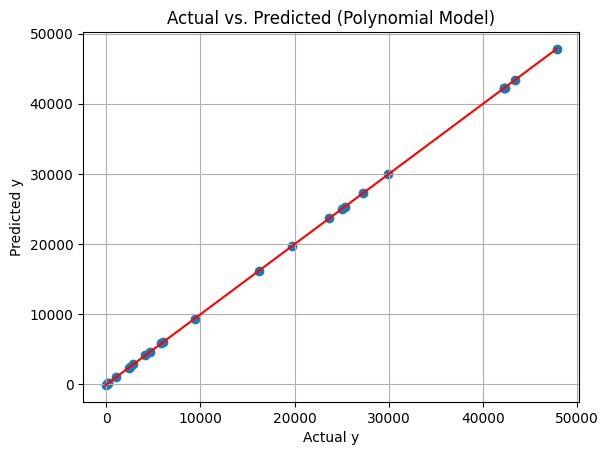

In [ ]:
import matplotlib.pyplot as plt

y_pred = poly_model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Actual vs. Predicted (Polynomial Model)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 45-degree line
plt.grid(True)
plt.show()


In [ ]:
# Trying a real dataset
# Goal here is to predict median house value for each district in California
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

data = fetch_california_housing(as_frame=True)
X, y = data.data, data.target

# Normalizing feature data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Adding a bias column
bias_X = np.column_stack([np.ones(X.shape[0]), scaled_X])

# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(bias_X, y, test_size=0.25, random_state=10)



float64


In [ ]:
# Training Regression Model

model = MyLinearRegression()
model.fit(X_train, y_train)
r2_train = model.r_squared(X_train, y_train)
r2_test = model.r_squared(X_test, y_test)
print(f"Training R-Squared: {r2_train}")
print(f"Test R-Squared: {r2_test}")


Training R-Squared: 0.6112671771317122
Test R-Squared: 0.5859370991934336


In [ ]:
# Me vs Scikit Learn
from sklearn.linear_model import LinearRegression 
scimodel = LinearRegression(fit_intercept=False)
scimodel.fit(X_train, y_train)
sk_r2_train = scimodel.score(X_train, y_train)
sk_r2_test = scimodel.score(X_test, y_test)
print(f"SciKit_Learn Training R-Squared: {sk_r2_train}")
print(f"SciKit_Learn Test R-Squared: {sk_r2_test}")


SciKit_Learn Training R-Squared: 0.6112671771315215
SciKit_Learn Test R-Squared: 0.5859370991928381


In [ ]:
print("My Model Weights:    ", model.theta)
print("Sklearn Model Weights    ", scimodel.coef_)

My Model Weights:     [ 2.06978529e+00  8.43189475e-01  1.22533425e-01 -2.91475673e-01
  3.69470317e-01  3.92452677e-04 -4.69030880e-02 -9.21203999e-01
 -8.90362466e-01]
Sklearn Model Weights     [ 2.06978529e+00  8.43189475e-01  1.22533425e-01 -2.91475673e-01
  3.69470317e-01  3.92452677e-04 -4.69030880e-02 -9.21203999e-01
 -8.90362466e-01]


[ 2.06978533e+00  8.43222400e-01  1.22555227e-01 -2.91478096e-01
  3.69421112e-01  3.85804255e-04 -4.68770138e-02 -9.20821152e-01
 -8.89991510e-01]
